In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
flights_data = pd.read_csv('data/Flights/flights2022.csv')
weather_data = pd.read_csv('data/Flights/flights_weather2022.csv')

weather_data

<ipython-input-2-86b0470fb7e5>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111001,2022,6,30,NaN,1155,NaN,NaN,2033,NaN,UA,...,SEA-EWR,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0
111002,2022,6,30,NaN,1448,NaN,NaN,1732,NaN,DL,...,SEA-LAX,60.0,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0
111003,2022,6,30,NaN,1751,NaN,NaN,2352,NaN,DL,...,SEA-ORD,65.0,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0
111004,2022,6,30,NaN,1145,NaN,NaN,2029,NaN,DL,...,SEA-JFK,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0


In [3]:
# ---- Busiest Routes Analysis ----
# Group by origin and destination
busiest_routes = flights_data.groupby(['origin', 'dest']).size().reset_index(name='flight_count')
busiest_routes = busiest_routes.sort_values(by='flight_count', ascending=False).head(10)

busiest_routes

,origin,dest,flight_count
46,PDX,SEA,3877
121,SEA,PDX,3870
58,SEA,ANC,3362
103,SEA,LAX,3318
137,SEA,SFO,3253
87,SEA,GEG,3100
102,SEA,LAS,3082
123,SEA,PHX,3036
76,SEA,DEN,2927
139,SEA,SJC,2360


In [4]:
# ---- Peak Periods Analysis ----
# Aggregate flights by month
flights_by_month = flights_data.groupby('month').size().reset_index(name='flight_count')
# Aggregate flights by hour
flights_by_hour = flights_data.groupby('hour').size().reset_index(name='flight_count')

flights_by_hour

,hour,flight_count
0,0,796
1,1,18
2,5,2919
3,6,5987
4,7,9134
5,8,7518
6,9,8443
7,10,6091
8,11,8991
9,12,5037


In [5]:
# ---- Delay Analysis ----
# Calculate average delay by airline
average_delays = flights_data.groupby('airline')['arr_delay'].mean().reset_index()
average_delays = average_delays.sort_values(by='arr_delay', ascending=False)

average_delays

,airline,arr_delay
7,JetBlue Airways,31.417188
1,Allegiant Air,22.119565
4,Frontier Airlines Inc.,11.051802
2,American Airlines Inc.,8.998606
10,Spirit Air Lines,5.578182
5,Hawaiian Airlines Inc.,4.591160
6,Horizon Air,4.192191
9,Southwest Airlines Co.,2.995841
0,Alaska Airlines Inc.,2.633175
3,Delta Air Lines Inc.,0.913329


In [12]:
# ---- Weather Impact Analysis ----
# Pre-aggregate weather data by origin and day
weather_aggregated = weather_data.groupby(['year', 'month', 'day', 'origin']).agg({'temp': 'mean', 'wind_speed': 'mean', 'precip': 'mean'}).reset_index()

# Pre-aggregate flight delays by origin and day
flights_aggregated = flights_data.groupby(['year', 'month', 'day', 'origin'])['arr_delay'].mean().reset_index()

# Merge the aggregated data
merged_aggregated = pd.merge(flights_aggregated, weather_aggregated, on=['year', 'month', 'day', 'origin'])

# Analyze delays based on weather conditions
weather_impact_temp = merged_aggregated.groupby('temp')['arr_delay'].mean().reset_index()
weather_impact_wind = merged_aggregated.groupby('wind_speed')['arr_delay'].mean().reset_index()
weather_impact_precip = merged_aggregated.groupby('precip')['arr_delay'].mean().reset_index()

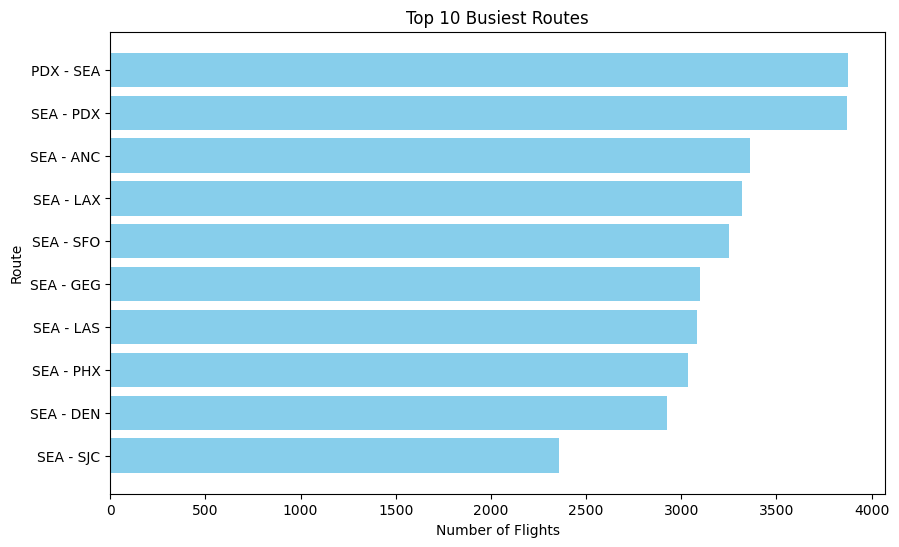

In [19]:
# ---- Visualizations ----
plt.figure(figsize=(10, 6))

# Plot busiest routes
plt.barh(busiest_routes['origin'] + ' - ' + busiest_routes['dest'], busiest_routes['flight_count'], color='skyblue')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.title('Top 10 Busiest Routes')
plt.gca().invert_yaxis()
plt.show()



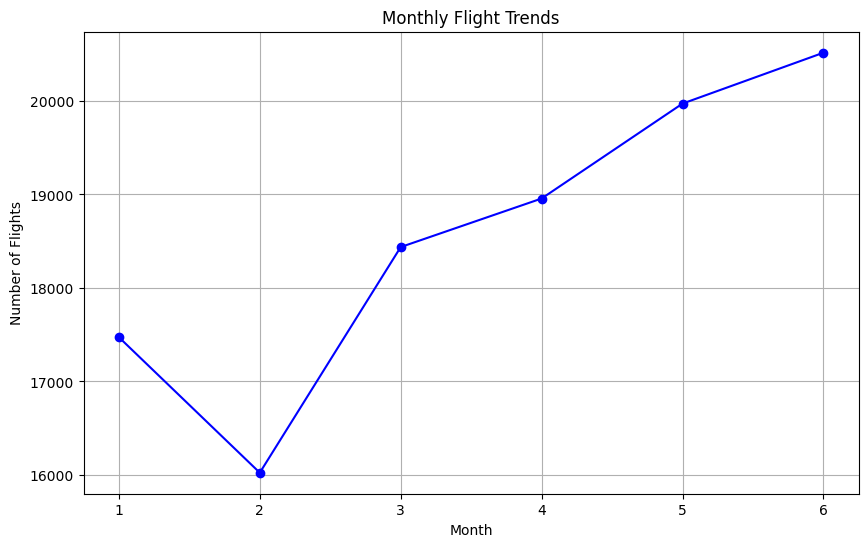

In [20]:
# Plot monthly trends
plt.figure(figsize=(10, 6))
plt.plot(flights_by_month['month'], flights_by_month['flight_count'], marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Monthly Flight Trends')
plt.grid()
plt.show()



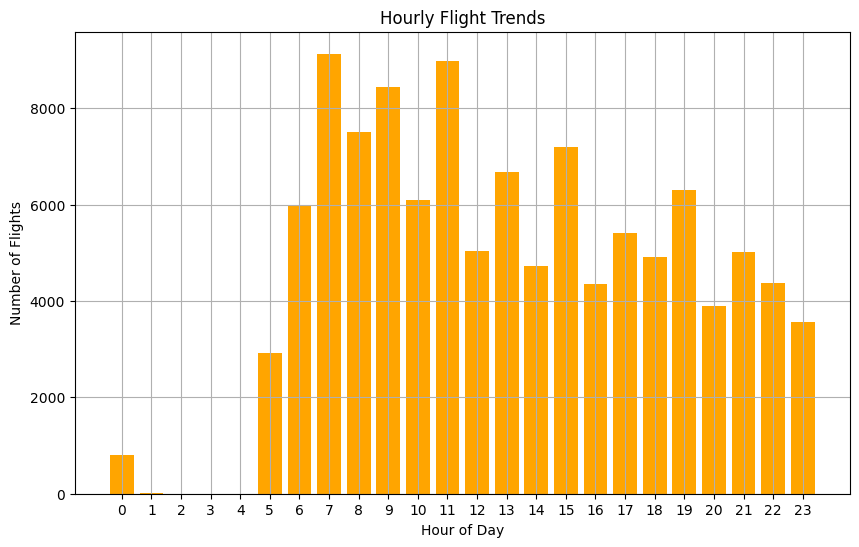

In [21]:
# Plot hourly trends
plt.figure(figsize=(10, 6))
plt.bar(flights_by_hour['hour'], flights_by_hour['flight_count'], color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.title('Hourly Flight Trends')
plt.xticks(range(0, 24))
plt.grid()
plt.show()



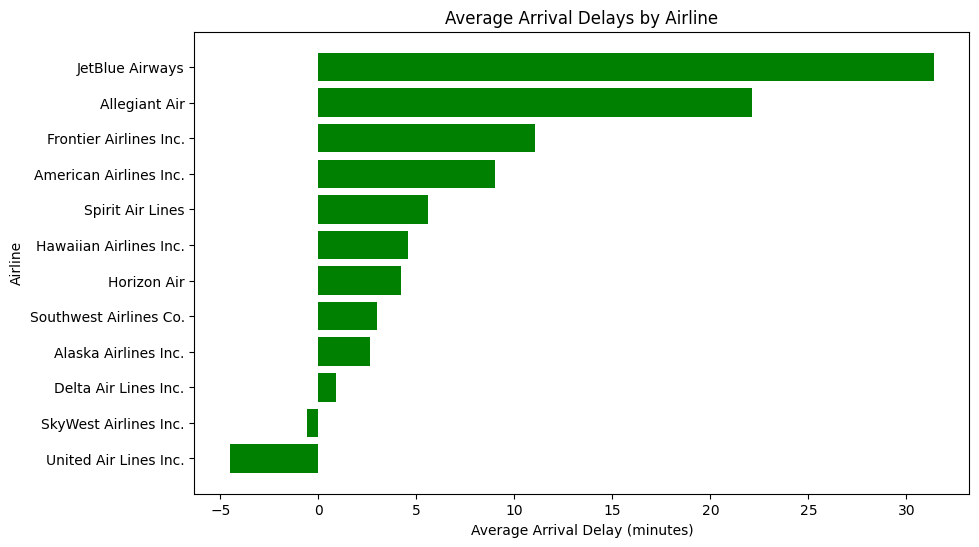

In [22]:
# Plot average delays by airline
plt.figure(figsize=(10, 6))
plt.barh(average_delays['airline'], average_delays['arr_delay'], color='green')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Airline')
plt.title('Average Arrival Delays by Airline')
plt.gca().invert_yaxis()
plt.show()



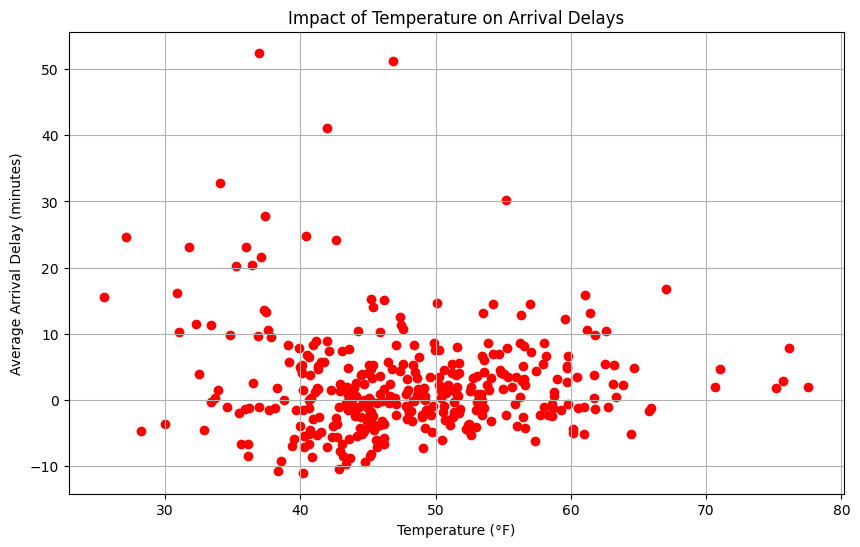

In [14]:
# Plot weather impact on delays
plt.figure(figsize=(10, 6))
plt.scatter(weather_impact_temp['temp'], weather_impact_temp['arr_delay'], color='red')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Impact of Temperature on Arrival Delays')
plt.grid()
plt.show()


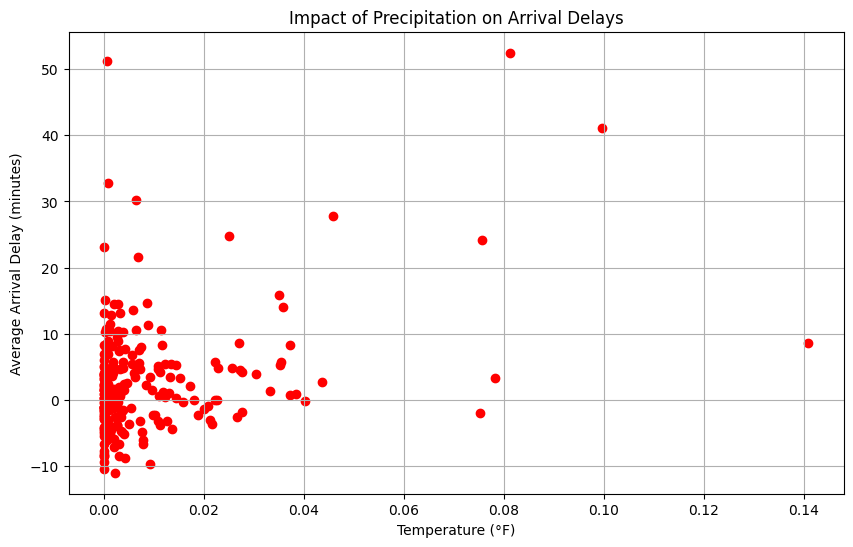

In [16]:
# Plot weather impact on delays
plt.figure(figsize=(10, 6))
plt.scatter(weather_impact_precip['precip'], weather_impact_precip['arr_delay'], color='red')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Impact of Precipitation on Arrival Delays')
plt.grid()
plt.show()

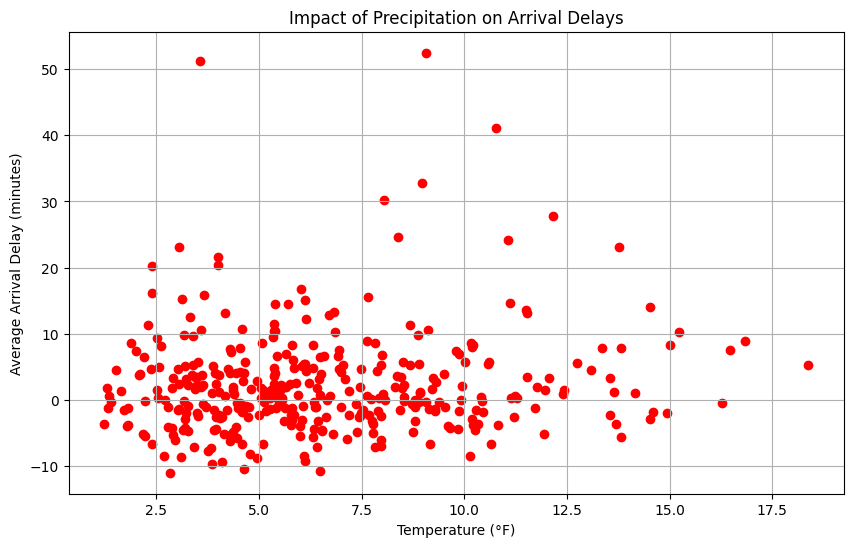

In [17]:
# Plot weather impact on delays
plt.figure(figsize=(10, 6))
plt.scatter(weather_impact_wind['wind_speed'], weather_impact_wind['arr_delay'], color='red')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Impact of Wind Speed on Arrival Delays')
plt.grid()
plt.show()